In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split


from sklearn.datasets import make_circles
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

from pylab import rcParams
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings("ignore")

In [2]:
X, y = make_circles(n_samples = 100, noise = 0.2, random_state = 1)

<AxesSubplot: >

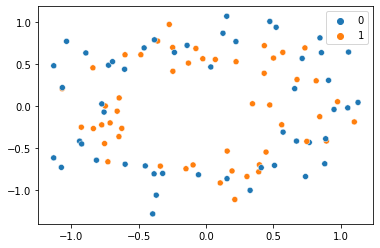

In [3]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

In [5]:
model = Sequential()

model.add(Dense(256, input_dim = 2, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [6]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [7]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 3500, verbose = 0)

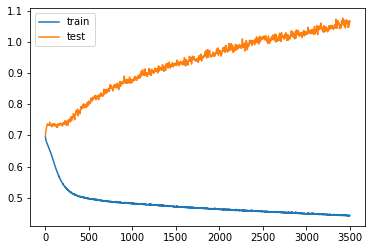

In [8]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()
plt.show()

3888/3888 [==============================] - 4s 903us/step


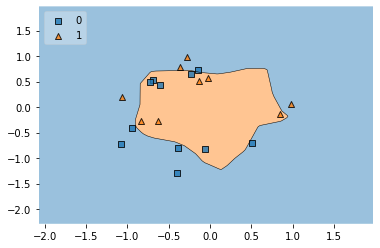

In [9]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend = 2)
plt.show()

In [10]:
#Applying Early Stopping

In [11]:
model = Sequential()

model.add(Dense(256, input_dim = 2, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [12]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [13]:
callback = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.00001,
    patience = 20,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = False
)

In [14]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 3500, callbacks = callback)

Epoch 1/3500
3/3 [==============================] - 0s 68ms/step - loss: 0.6921 - accuracy: 0.4875 - val_loss: 0.6845 - val_accuracy: 0.5500
Epoch 2/3500
3/3 [==============================] - 0s 11ms/step - loss: 0.6889 - accuracy: 0.4875 - val_loss: 0.6899 - val_accuracy: 0.5500
Epoch 3/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6868 - accuracy: 0.4875 - val_loss: 0.6942 - val_accuracy: 0.5500
Epoch 4/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6854 - accuracy: 0.5125 - val_loss: 0.6985 - val_accuracy: 0.5000
Epoch 5/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6835 - accuracy: 0.5500 - val_loss: 0.7017 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 12ms/step - loss: 0.6827 - accuracy: 0.5250 - val_loss: 0.7053 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 14ms/step - loss: 0.6813 - accuracy: 0.5875 - val_loss: 0.7088 - val_accuracy: 0.4000
Epoch 8/3500


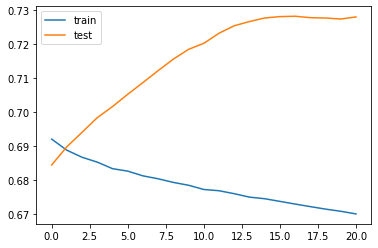

In [15]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()
plt.show()

3888/3888 [==============================] - 4s 1ms/step


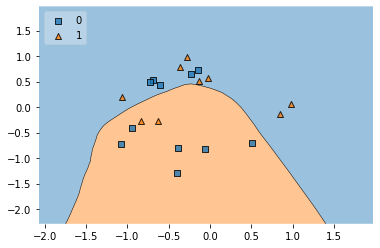

In [16]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend = 2)
plt.show()